In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download misrakahmed/vegetable-image-dataset

Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
 97% 519M/534M [00:02<00:00, 170MB/s]
100% 534M/534M [00:02<00:00, 220MB/s]


In [3]:
import zipfile

zip_ref = zipfile.ZipFile('/content/vegetable-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Data preparation


In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
train_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/Vegetable Images/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)



)

Found 15000 files belonging to 15 classes.


In [6]:
val_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/Vegetable Images/validation',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)



)

Found 3000 files belonging to 15 classes.


In [7]:

classes=train_dataset.class_names

In [8]:
classes

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [9]:
#normalizing:

In [10]:
def process(image,label):
  iamge=tf.cast(image/255.0,tf.float32)
  return image,label



In [11]:
train_dataset=train_dataset.map(process)
val_dataset=val_dataset.map(process)


Usually preprocessing done:
-resizing ->we did into 128x128
-normalzing-> done
augmentation->not needed
bgr2rgb-> not done(using cv2)



# MODEL BUILDING

In [43]:
from keras.models import Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dense,Dropout

In [44]:
model=Sequential([
    Input(shape=(128,128,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64,3,activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(128,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(256,3,activation='relu'),
    MaxPooling2D(),

    GlobalAveragePooling2D(),
   Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(len(classes),activation='softmax')


])

In [45]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 432,143 (1.65 MB)

 Trainable params: 432,143 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']



)

In [47]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=7,restore_best_weights=True)



In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    'model_checkpoint.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [49]:
history=model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    callbacks=[checkpoint,early_stopping])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1324 - loss: 3.3922
Epoch 1: val_accuracy improved from -inf to 0.38800, saving model to model_checkpoint.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 82ms/step - accuracy: 0.1325 - loss: 3.3903 - val_accuracy: 0.3880 - val_loss: 1.8894
Epoch 2/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3746 - loss: 1.8397
Epoch 2: val_accuracy improved from 0.38800 to 0.66667, saving model to model_checkpoint.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.3749 - loss: 1.8391 - val_accuracy: 0.6667 - val_loss: 1.1130
Epoch 3/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5863 - loss: 1.2379
Epoch 3: val_accuracy improved from 0.66667 to 0.77867, saving model to model_checkpoint.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.5865 - loss: 1.2375 - val_accuracy: 0.7787 - val_loss: 0.7878
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7119 - loss: 0.9130
Epoch 4: val_accuracy improved from 0.77867 to 0.81667, saving model to model_checkpoint.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.7120 - loss: 0.9129 - val_accuracy: 0.8167 - val_loss: 0.6458
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7971 - loss: 0.6746
Epoch 5: val_accuracy improved from 0.81667 to 0.88100, saving model to model_checkpoint.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.7971 - loss: 0.6745 - val_accuracy: 0.8810 - val_loss: 0.3964
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8468 - loss: 0.5344
Epoch 6: val_accuracy improved from 0.88100 to 0.91033, saving model to model_checkpoint.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.8469 - loss: 0.5343 - val_accuracy: 0.9103 - val_loss: 0.3179
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8577 - loss: 0.4944
Epoch 7: val_accuracy did not improve from 0.91033
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 72ms/step - accuracy: 0.8577 - loss: 0.4944 - val_accuracy: 0.9093 - val_loss: 0.3177
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8826 - loss: 0.4051
Epoch 8: val_accuracy improved from 0.91033 to 0.94267, saving model to model_checkpoint.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.8826 - loss: 0.4051 - val_accuracy: 0.9427 - val_loss: 0.2101
Epoch 9/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9161 - loss: 0.2972
Epoch 9: val_accuracy did not improve from 0.94267
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9161 - loss: 0.2971 - val_accuracy: 0.9343 - val_loss: 0.2134
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9110 - loss: 0.3111
Epoch 10: val_accuracy improved from 0.94267 to 0.95067, saving model to model_checkpoint.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.9110 - loss: 0.3110 - val_accuracy: 0.9507 - val_loss: 0.1778


# TESTING MODEL

In [50]:
test=keras.utils.image_dataset_from_directory(
    directory='/content/Vegetable Images/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)



)

Found 3000 files belonging to 15 classes.


In [62]:
test_loss, test_accuracy = model.evaluate(test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.9566 - loss: 0.1530
Test Loss: 0.16913558542728424
Test Accuracy: 0.9553333520889282


In [52]:
class_names=test.class_names

In [53]:
class_names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [63]:
model.save("my_model.keras")


In [64]:
model = tf.keras.models.load_model("my_model.keras")  # or .h5



/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [71]:
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image

# # Correct variable
# img_path = "/content/Vegetable Images/train/Carrot/0003.jpg"

# # Load image with correct target size
# img = image.load_img(img_path, target_size=(256, 256))  # match model input!

# # Show the image before converting
# plt.imshow(img)
# plt.axis('off')
# plt.show()

# # Convert to array and normalize
# img_array = image.img_to_array(img) / 255.0
# img_array = np.expand_dims(img_array, axis=0)

# # Predict
# prediction = model.predict(img_array)
# predicted_class_index = np.argmax(prediction)

# print(prediction)
# print(predicted_class_index)

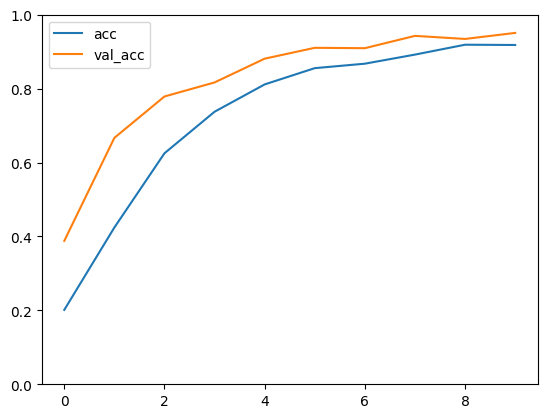

In [72]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
n = len(acc)
plt.ylim(0.0, 1.0)
plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.legend()